# Example Entity Identification Notebook

## Initialize MSTICPy and load query providers

In [1]:
# Core MSTICPy initialization for Notebooks
from msticpy.nbtools import nbinit
nbinit.init_notebook(namespace=globals());

# Load query providers (typically you'll be using just one)
qry_prov = QueryProvider("AzureSentinel")

Please wait. Loading Kqlmagic extension...


## Connect to workspace

In [2]:
qry_prov.connect(WorkspaceConfig())

# Infer entities in dataset

## Import module and instantiate class with the query provider

In [3]:
import entity_id as eid
e = eid.EntityIdentifier(qry_prov)

## 1. Select tables to analyze

These tables will make up your dataset.

In [4]:
e.select_tables()

## 2. Run entity detection on tables

This function iterates over every column in each table that was selected and applies every regex to it. The output is a dictionary where the keys are the entities found in the dataset (where dataset is the selected tables) and the values are the table in which the entity was found and the column in that table whose data values matched the entity regex.

In [5]:
e.detect_entities()

100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


{'azureresource': [('SigninLogs', 'ResourceId')],
 'host': [('SigninLogs', 'Resource'),
  ('SigninLogs', 'ResourceGroup'),
  ('SigninLogs', 'Identity'),
  ('SigninLogs', 'UserDisplayName')],
 'account': [('SigninLogs', 'AlternateSignInName'),
  ('SigninLogs', 'UserPrincipalName'),
  ('SigninLogs', 'SignInIdentifier')],
 'ipaddress': [('SigninLogs', 'IPAddress')]}

## 3. Save results to a JSON file.

Save the entity detection results to a file so that the next time you start up a notebook, you can just call read_results() to initialize the class variables for the results instead of running the entity detection function again.

In [6]:
e.save_results()

## 4. View the regex matching results in an HTML table.

Select a table in your dataset to view the columns that matched with a regex. It displays the regex matches, corresponding entities, match percentages, and entity priorities.

In [7]:
nbwidgets.SelectItem(item_list=list(qry_prov.schema.keys()), height="300px", action=e.table_match_to_html)

Column,Matches
TenantId,
ResourceId,"azureresource [p:0] (matched RESOURCEID_REGEX 100.0%, all rows 100.0%) file [p:2] (matched LXPATH_REGEX 100.0%, all rows 100.0%)"
CorrelationId,
Resource,"host [p:1] (matched DNS_REGEX 100.0%, all rows 100.0%)"
ResourceGroup,"host [p:1] (matched DNS_REGEX 100.0%, all rows 100.0%)"
Identity,"host [p:1] (matched DNS_REGEX 1.0%, all rows 1.0%)"
AlternateSignInName,"account [p:0] (matched EMAIL_REGEX 100.0%, all rows 32.0%)"
AppId,
Id,
IPAddress,"ipaddress [p:0] (matched IPV6_REGEX 14.0%, all rows 14.0%)"


## 5. View the table map

This is the actual column to entity mapping after the raw regex matching results have been processed.

In [30]:
e.show_table_map_html()

Table,Column,Entity
OfficeActivity,UserKey,account
OfficeActivity,OfficeObjectId,url
OfficeActivity,UserId,account
OfficeActivity,UserId_,account
OfficeActivity,ClientIP,ipaddress
OfficeActivity,ClientIP_,ipaddress
OfficeActivity,Site_Url,url
OfficeActivity,Site_Url_,url
OfficeActivity,SourceFileName,host
OfficeActivity,SourceFileName_,host


## 6. View the entity map

This shows the same results as the table map, except the keys and values are inverted. For any given entity, you can see the table and columns that contain it.

In [31]:
e.show_entity_map_html()

Entity,Table,Column
account,OfficeActivity,UserKey
account,OfficeActivity,UserId
account,OfficeActivity,UserId_
account,OfficeActivity,MailboxOwnerUPN
account,OfficeActivity,MailboxOwnerSid
account,OfficeActivity,LogonUserSid
account,OfficeActivity,TargetUserOrGroupName
account,SecurityEvent,Account
account,SecurityEvent,FilePath
account,SecurityEvent,MandatoryLabel


# Autogenerate KQL queries

## 7. Generate a list of queries to hunt for a piece of data in your dataset

To find where a piece of data, like an IP address or email, appears in the dataset, call the below function passing in the data value and its associated entity type.

In [8]:
queries = e.generate_query('account', 'purviewdc@seccxp.ninja')
print(queries)

['\nSigninLogs\n| where AlternateSignInName == "purviewdc@seccxp.ninja"\n', '\nSigninLogs\n| where UserPrincipalName == "purviewdc@seccxp.ninja"\n', '\nSigninLogs\n| where SignInIdentifier == "purviewdc@seccxp.ninja"\n']


## 8. Run the queries that return an output

Runs each query and returns the resulting table, if its not empty.

In [9]:
e.run_queries([queries[-3]])


SigninLogs
| where AlternateSignInName == "purviewdc@seccxp.ninja"

--------------------------------------------------------------------


,TenantId,SourceSystem,TimeGenerated,ResourceId,OperationName,OperationVersion,Category,ResultType,ResultSignature,ResultDescription,DurationMs,CorrelationId,Resource,ResourceGroup,ResourceProvider,Identity,Level,Location,AlternateSignInName,AppDisplayName,AppId,AuthenticationDetails,AuthenticationMethodsUsed,AuthenticationProcessingDetails,AuthenticationRequirement,...,RiskEventTypes,RiskEventTypes_V2,RiskLevelAggregated,RiskLevelDuringSignIn,RiskState,ResourceDisplayName,ResourceIdentity,ServicePrincipalId,ServicePrincipalName,Status,TokenIssuerName,TokenIssuerType,UserAgent,UserDisplayName,UserId,UserPrincipalName,AADTenantId,UserType,FlaggedForReview,IPAddressFromResourceProvider,SignInIdentifier,SignInIdentifierType,ResourceTenantId,HomeTenantId,Type
0,8ecf8077-cf51-4820-aadd-14040956f35d,Azure AD,2021-06-18 15:00:59.181000+00:00,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,,0,9f5f7a97-b25a-4d7d-9080-18404ad03985,Microsoft.aadiam,Microsoft.aadiam,,Purview DataCurator,4,GB,purviewdc@seccxp.ninja,Microsoft Azure CLI,04b07795-8ddb-461a-bbee-02f9e1bf7b46,"[\r\n {\r\n ""authenticationStepDateTime"": ""2021-06-18T15:00:59.1811534+00:00"",\r\n ""authe...",,"[\r\n {\r\n ""key"": ""IsCAEToken"",\r\n ""value"": ""False""\r\n }\r\n]",singleFactorAuthentication,...,[],[],none,none,none,Windows Azure Service Management API,797f4846-ba00-4fd7-ba43-dac1f8f63013,,,{'errorCode': 0},,AzureAD,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version...",Purview DataCurator,ad75bd68-b15a-465b-8192-0bf2ce84095a,purviewdc@seccxp.ninja,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Member,None,,purviewdc@seccxp.ninja,,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,SigninLogs
1,8ecf8077-cf51-4820-aadd-14040956f35d,Azure AD,2021-06-18 14:52:22.954000+00:00,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,,0,a11ce5b0-272c-4f3c-8f50-d13edc728764,Microsoft.aadiam,Microsoft.aadiam,,Purview DataCurator,4,GB,purviewdc@seccxp.ninja,Microsoft Azure Purview Studio,632d803a-b0c2-49b4-a944-e13c384c04a8,"[\r\n {\r\n ""authenticationStepDateTime"": ""2021-06-18T14:52:22.9540657+00:00"",\r\n ""authe...",,"[\r\n {\r\n ""key"": ""IsCAEToken"",\r\n ""value"": ""False""\r\n }\r\n]",singleFactorAuthentication,...,[],[],none,none,none,Microsoft Graph,00000003-0000-0000-c000-000000000000,,,{'errorCode': 0},,AzureAD,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91...",Purview DataCurator,ad75bd68-b15a-465b-8192-0bf2ce84095a,purviewdc@seccxp.ninja,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Member,None,,purviewdc@seccxp.ninja,,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,SigninLogs
2,8ecf8077-cf51-4820-aadd-14040956f35d,Azure AD,2021-06-19 15:12:18.290000+00:00,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,,0,15264990-6fb2-4011-b79b-37aa76325d9f,Microsoft.aadiam,Microsoft.aadiam,,Purview DataCurator,4,GB,purviewdc@seccxp.ninja,Microsoft Azure Purview Studio,632d803a-b0c2-49b4-a944-e13c384c04a8,"[\r\n {\r\n ""authenticationStepDateTime"": ""2021-06-19T15:12:18.2907927+00:00"",\r\n ""authe...",,"[\r\n {\r\n ""key"": ""IsCAEToken"",\r\n ""value"": ""False""\r\n }\r\n]",singleFactorAuthentication,...,[],[],none,none,none,Microsoft Graph,00000003-0000-0000-c000-000000000000,,,{'errorCode': 0},,AzureAD,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91...",Purview DataCurator,ad75bd68-b15a-465b-8192-0bf2ce84095a,purviewdc@seccxp.ninja,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Member,None,,purviewdc@seccxp.ninja,,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,SigninLogs
3,8ecf8077-cf51-4820-aadd-14040956f35d,Azure AD,2021-06-19 15:12:56.868000+00:00,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524

## 9. Generate a union query

As an alternative to running each query individually and seeing the individual tables, generate a single query and specify which columns you are interested in.

In [10]:
field_names = ['TimeGenerated', 'Type', 'UserPrincipalName', 'ResourceId', 'IPAddress']
query = e.generate_union_query('account', 'purviewdc@seccxp.ninja', field_names)

## 10. Run the union query

In [11]:
e.run_queries([query])

(union isfuzzy= true
(
SigninLogs
| where AlternateSignInName == "purviewdc@seccxp.ninja"
or UserPrincipalName == "purviewdc@seccxp.ninja"
or SignInIdentifier == "purviewdc@seccxp.ninja"
))
| project TimeGenerated, Type, UserPrincipalName, ResourceId, IPAddress
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,TimeGenerated,Type,UserPrincipalName,ResourceId,IPAddress
0,2021-06-23 13:41:44.680000+00:00,SigninLogs,purviewdc@seccxp.ninja,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,24.80.114.130
1,2021-06-23 13:31:25.987000+00:00,SigninLogs,purviewdc@seccxp.ninja,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,146.199.172.132
2,2021-06-23 14:58:42.828000+00:00,SigninLogs,purviewdc@seccxp.ninja,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,146.199.172.132
3,2021-06-23 14:58:47.266000+00:00,SigninLogs,purviewdc@seccxp.ninja,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,146.199.172.132
4,2021-06-23 14:06:31.726000+00:00,SigninLogs,purviewdc@seccxp.ninja,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,70.31.43.157
...,...,...,...,...,...
1012,2021-07-08 12:34:48.348000+00:00,SigninLogs,purviewdc@seccxp.ninja,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,82.4.109.66
1013,2021-07-08 17:34:57.758000+00:00,SigninLogs,purviewdc@seccxp.ninja,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,71.227.178.247
1014,2021-07-08 13:47:37.035000+00:00,SigninLogs,purviewdc@seccxp.ninja,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,37.225.3.89
1015,2021-07-08 13:47:37.035000+00:00,SigninLogs,purviewdc@seccxp.ninja,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,37.225.3.89


# Visualize entities

## See how entities are distributed in your dataset

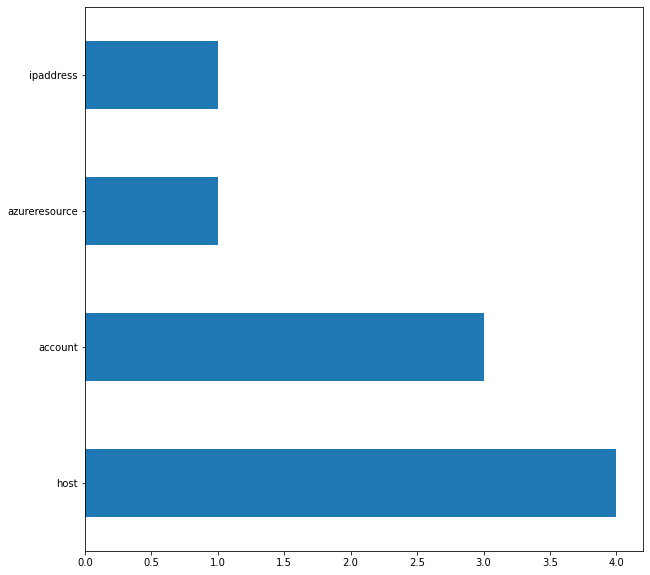

In [12]:
e.show_entity_dist()

## See a network graph showing the tables in your dataset and entities contained in them

In [13]:
e.show_entity_graph()

## See a network graph for a given entity

In [15]:
e.show_single_entity_graph("account")

## See a Sankey diagram showing the flow from entity to table

In [16]:
e.show_sankey()